In [11]:
from HI_utils.src import data_conv as dc
from HI_utils.src import data_format
import h5py
import numpy as np
import matplotlib.pyplot as plt

from astropy.time import Time
from astropy.coordinates import EarthLocation
import astropy.units as u
reload(dc)
reload(data_format)

<module 'HI_utils.src.data_format' from '/users/ycli/.local/lib/python2.7/site-packages/HI_utils/src/data_format.pyc'>

In [2]:
reload(dc)
data_path = '/scratch/users/ycli/.test/bk/'
data_list = ['SDSS_N_2a_arcdrfit-M01_W_0001.fits',]
data_file_list = [data_path + f for f in data_list]


fdata = data_format.FASTfits_Spec(data_file_list)

In [3]:
dec0 = 26.15294
feed_rotation = 0
ra, dec = dc.get_pointing_meridian_scan(fdata.time, dec0, feed_rotation=feed_rotation)


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


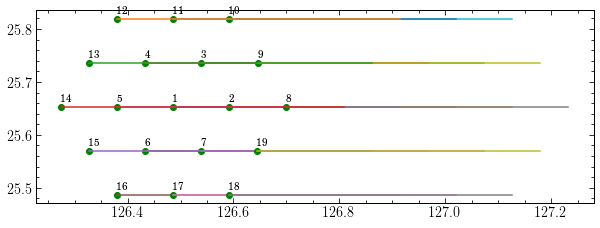

In [4]:
plt.figure(figsize=(10, 6))
for ii in range(19):
    plt.plot(ra[0, ii], dec[0, ii],  'go')
    plt.text(ra[0, ii], dec[0, ii] + 0.01, '%d'%(ii + 1))
    plt.plot(ra[:, ii], dec[:, ii],  '-')
    
    #plt.polar(_c[0, ii].ra.deg, (90 - _c[0, ii].dec.deg)*3600,  'go')
    #plt.polar(_c[:, ii].ra.deg, (90 - _c[:, ii].dec.deg)*3600,  '-')
    
    plt.axes().set_aspect('equal')
    #plt.ylim(80, 95)

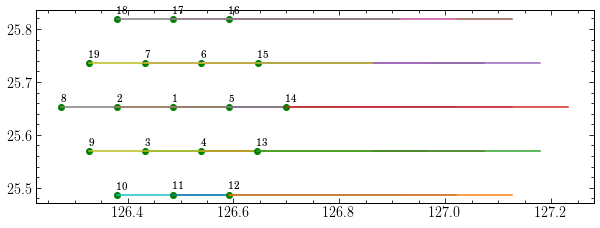

In [22]:
fdata.rebin_freq(16)

Degrade frequency resolution from   0.476837158203 kHz to   7.629394531250 kHz,
By combining avery 16 frequency bins
Freq(0) = 1000.003337860107 MHz, dFreq =   7.629394531250 kHz


In [24]:
print fdata.data.shape

(128, 65536, 4)


In [6]:



print fdata.data.shape
print fdata.mask.shape
print fdata.freq.shape
print fdata.time.shape
print fdata.date_obs.datetime.strftime('%Y/%m/%d %H:%M:%S')
print 1024 * 1024
print 64 * 1024
print 1024 / 64

(128, 1048576, 4)
(128, 1048576, 4)
(1048576,)
(128,)
2019/05/27 09:00:00
1048576
65536
16


In [4]:
data_path   = '/scratch/users/ycli/.test/'
output_path = data_path + 'test.h5'
data_file   = 'SDSS_N_2a_arcdrfit-M%02d_W_%04d.fits'
dec0 = 25.65294
beam_list   = [1, 2]
block_list  = [1, 2]

dc.convert_to_tl(data_path, data_file, output_path, dec0 = 25.65294, feed_rotation=0.,
                 beam_list=beam_list, block_list=block_list, degrade_freq_resol=16)

/scratch/users/ycli/.test/SDSS_N_2a_arcdrfit-M01_W_0001.fits
/scratch/users/ycli/.test/SDSS_N_2a_arcdrfit-M01_W_0002.fits
Flag NCal 1 of every 8 time stamps with delay of 0 time stamps
Degrade frequency resolution from   0.476837158203 kHz to   7.629394531250 kHz
By averaging avery 16 frequency bins
Freq(0) = 1000.003337860107 MHz, dFreq =   7.629394531250 kHz


/scratch/users/ycli/.test/SDSS_N_2a_arcdrfit-M02_W_0001.fits
/scratch/users/ycli/.test/SDSS_N_2a_arcdrfit-M02_W_0002.fits
Flag NCal 1 of every 8 time stamps with delay of 0 time stamps
Degrade frequency resolution from   0.476837158203 kHz to   7.629394531250 kHz
By averaging avery 16 frequency bins
Freq(0) = 1000.003337860107 MHz, dFreq =   7.629394531250 kHz




In [9]:
import h5py 
data_path = '/scratch/users/ycli/.test/raw/'
file_name_list = [data_path + 'SDSS_N_2a_arcdrfit0011-0020.h5', ] 
with h5py.File(file_name_list[0], 'r') as fh:
    print fh.attrs['freqstep']
    print fh.attrs.keys()
    _Lat = fh.attrs['sitelat']
    _Lon = fh.attrs['sitelon']
    data = fh['vis'][:]
    ra   = fh['ra'][:]
    dec  = fh['dec'][:]
    t = fh['sec1970'][:]
    #f = fh['freqs'][:]
    #print fh.attrs['history']

0.48828125
[u'nickname', u'comment', u'observer', u'keywordver', u'sitename', u'sitelat', u'sitelon', u'siteelev', u'timezone', u'epoch', u'telescope', u'dishdiam', u'cylen', u'cywid', u'recvver', u'lofreq', u'corrver', u'samplingbits', u'corrmode', u'inttime', u'obstime', u'sec1970', u'nfreq', u'freqstart', u'freqstep', u'history', u'nants', u'npol']


In [51]:
print (4 * data.size) / 1024 / 1024 * 64 / 1024
print (data.size) * 64 / 1024 / 1024 / 1024
a = np.array([1, 0, 1], dtype='bool')
print a.dtype
print a.itemsize
print a
b = a.astype('uint8')
print b.dtype
print b

23
5
bool
1
[ True False  True]
uint8
[1 0 1]


In [49]:
a = np.array([1.e-7, 2.e-7], dtype='float32')
print a.dtype
print a.itemsize
b = a.astype('float32')
print b.dtype
print b

print np.finfo('float64')
print np.finfo('float32')

float32
4
float32
[1.e-07 2.e-07]
Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------



In [15]:
    
dec0 = 26.15294
feed_rotation = 0    
_ra, _dec = dc.get_pointing_meridian_scan(t, dec0, feed_rotation=feed_rotation)

0.48828125
Convert from:
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0011.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0012.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0013.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0014.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0015.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0016.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0017.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0018.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0019.fits
/data31/2019a-053-SC/SDSS_N_2a/20190527/SDSS_N_2a_arcdrfit-M01_W_0020.fits
Flag NCal 1 of every 8 time stamps with delay of 0 time stamps
Degrade frequency resolution from   0.476837158203 kHz to 488.281250000000 kHz
By averaging avery 1024 frequency bins
Freq(0) = 1000.243663787842 MHz, dFreq = 488

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


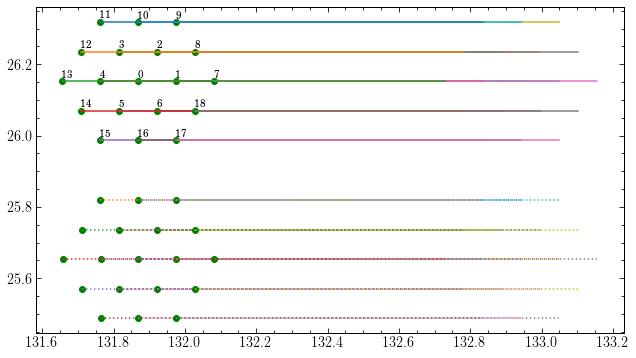

In [3]:
plt.figure(figsize=(12, 6))

for i in range(19):
    plt.plot(ra[0,i], dec[0,i], 'go')
    #plt.text(ra[0, i], dec[0, i] + 0.01, '%d'%(i))
    plt.plot(ra[:,i], dec[:,i], ':')
    plt.axes().set_aspect('equal')
    
for i in range(19):
    plt.plot(_ra[0,i], _dec[0,i], 'go')
    plt.text(_ra[0, i], _dec[0, i] + 0.01, '%d'%(i))
    plt.plot(_ra[:,i], _dec[:,i])
    plt.axes().set_aspect('equal')

In [25]:
tt = Time(t, format='unix', location=EarthLocation(_Lon, _Lat))
#tt = tt.utc.datetime
#for _t in tt:
#print tt[0].strftime('%Y%m%d_UTC%Hh%Mm%Ss')
print tt.sidereal_time('apparent')[0].to(u.deg).value
print (tt.sidereal_time('apparent')[0] + (15 * u.arcmin)).to(u.deg).value - tt.sidereal_time('apparent')[0].to(u.deg).value

131.869678148
0.25
